## Bike sharing demand

* datetime-시간별 날짜 + 타임 스탬프
* season-1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
* holiday-휴일로 간주되는지 여부
* workingday-주말이 아닌 휴일이든 아니든
* weather-1 : 맑음, 구름 조금, 흐림
*         2 : 안개 + 흐림, 안개 + 깨진 구름, 안개 + 구름이 거의 없음, 안개
*         3 : 가벼운 눈, 가벼운 비 + 뇌우 + 흩어진 구름, 가벼운 비 + 흩어진 구름
*         4 : 폭우 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개
* temp-섭씨 온도
* atemp-섭씨 온도 "느낌"
* humidity-상대 습도
* windspeed-풍속
* casual-시작된 미등록 사용자 대여 수
* registered-시작된 등록 된 사용자 대여 수
* count-총 임대 수

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
!move "C:\Users\jju53\OneDrive\바탕 화면\bike-sharing-demand\train_bike.csv" .
!move "C:\Users\jju53\OneDrive\바탕 화면\bike-sharing-demand\test_bike.csv" .

        1개 파일을 이동했습니다.
        1개 파일을 이동했습니다.


## Data Scaling

* train, test 데이터 합쳐서 scaling 진행

In [2]:
# id변수는 0=train, 1=test

train_df = pd.read_csv("./train_bike.csv")
train_df = pd.DataFrame(train_df).copy()
train_df['id']=0

test_df=pd.read_csv("./test_bike.csv")
test_df=pd.DataFrame(test_df).copy()
test_df['id']=1

all_df = train_df.append(test_df)
all_df

train_df.info()
test_df.info()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,id
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,1
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,1
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,1
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  id          10886 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non

In [3]:
# casual, registered 데이터가 전혀 없기 때문에 제외하고 분석 진행

all_df.info()

all_df=all_df.drop(['casual','registered'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  id          17379 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 1.9+ MB


### datetime 분할

#### year 수정

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,id,year,year_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,0,2011,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,0,2011,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,0,2011,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,0,2011,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,0,2011,0


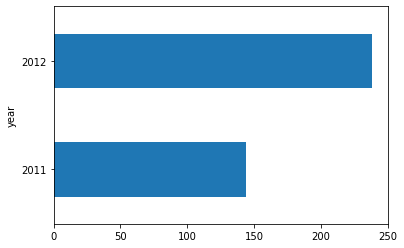

In [4]:
all_df['year']=all_df['datetime'].str.split(' ').str[0].str.split('-').str[0]



all_df_list = [all_df]
all_df.groupby(['year']).mean()['count'].plot(kind='barh')

for dataset in all_df_list:
    dataset.loc[all_df['year']=='2011', 'year_cat'] = 0,
    dataset.loc[all_df['year']=='2012', 'year_cat'] = 1
    
    all_df['year_cat']=all_df['year_cat'].astype(int)

all_df.head()

#### hour 수정

In [5]:
all_df['hour']=all_df['datetime'].str.split(' ').str[1].str.split(':').str[0]

all_df['hour'].unique()

# 00, 01, 02, 03, 04, 05 : 새벽
# 06, 07, 08, 09, 10, 11 : 아침
# 12, 13, 14, 15, 16, 17 : 오전
# 18, 19, 20, 21, 22, 23 : 오후



for dataset in all_df_list:
    dataset.loc[all_df['hour'].str.contains("00|01|02|03|04|05"), 'hour_cat'] = 0,
    dataset.loc[all_df['hour'].str.contains("06|07|08|09|10|11"), 'hour_cat'] = 1,
    dataset.loc[all_df['hour'].str.contains("12|13|14|15|16|17"), 'hour_cat'] = 2,
    dataset.loc[all_df['hour'].str.contains("18|19|20|21|22|23"), 'hour_cat'] = 3
    
    all_df['hour_cat']=all_df['hour_cat'].astype(int)



all_df.head()

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,id,year,year_cat,hour,hour_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,0,2011,0,00,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,0,2011,0,01,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,0,2011,0,02,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,0,2011,0,03,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,0,2011,0,04,0


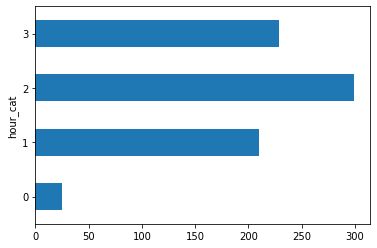

In [6]:
all_df.groupby(['hour_cat']).mean()['count'].plot(kind='barh')

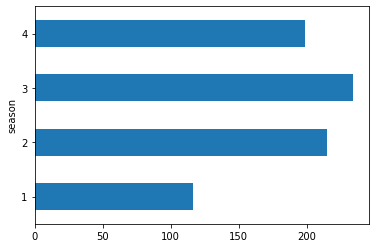

In [7]:
all_df.groupby(['season']).mean()['count'].plot(kind='barh')

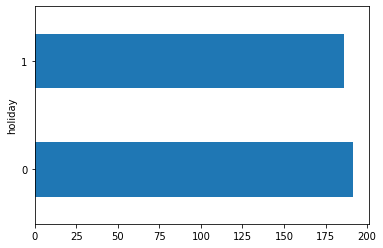

In [8]:
all_df.groupby(['holiday']).mean()['count'].plot(kind='barh')

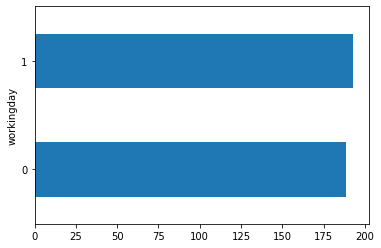

In [9]:
all_df.groupby(['workingday']).mean()['count'].plot(kind='barh')

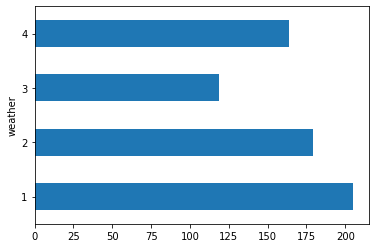

In [10]:
all_df.groupby(['weather']).mean()['count'].plot(kind='barh')

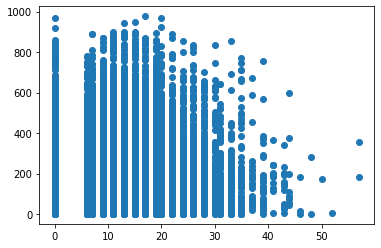

In [11]:
plt.scatter(all_df['windspeed'], all_df['count'])

## linear regression

In [12]:
all_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,id,year,year_cat,hour,hour_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,0,2011,0,00,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,0,2011,0,01,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,0,2011,0,02,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,0,2011,0,03,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,0,2011,0,04,0


In [14]:
all=all_df.drop(['datetime','hour_cat', 'year'], axis=1)
all


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,id,year_cat,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16.0,0,0,00
1,1,0,0,1,9.02,13.635,80,0.0000,40.0,0,0,01
2,1,0,0,1,9.02,13.635,80,0.0000,32.0,0,0,02
3,1,0,0,1,9.84,14.395,75,0.0000,13.0,0,0,03
4,1,0,0,1,9.84,14.395,75,0.0000,1.0,0,0,04
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,NaN,1,1,19
6489,1,0,1,2,10.66,12.880,60,11.0014,NaN,1,1,20
6490,1,0,1,1,10.66,12.880,60,11.0014,NaN,1,1,21
6491,1,0,1,1,10.66,13.635,56,8.9981,NaN,1,1,22


In [15]:
train = all[all['id']==0]
test = all[all['id']==1]

train_x = train.drop(['count', 'id'], axis=1)
train_y = train['count']

test_x = test.drop(['count', 'id'], axis=1)

train_x.info()
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   year_cat    10886 non-null  int32  
 9   hour        10886 non-null  object 
dtypes: float64(3), int32(1), int64(5), object(1)
memory usage: 893.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6493 entries, 0 to 6492
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      6493 non-null   int64  
 1   holiday     6493 non-null   int64  
 2   workingday  6493 non-null   int64  
 3   weather 

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(train_x, train_y)


train_y_predict = rf.predict(train_x)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

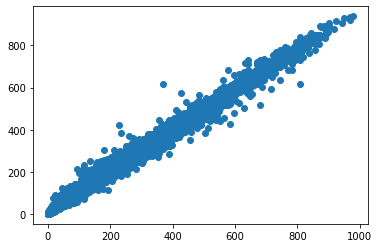

In [18]:
plt.scatter(train_y, train_y_predict)

In [32]:
test_predict = rf.predict(test_x)
test_predict

array([ 10.46      ,   4.14      ,   3.63      , ...,  99.46      ,
       103.12916667,  55.39      ])

In [33]:
submission=pd.DataFrame({"datetime":test_df['datetime'].tolist(),"count":test_predict})
submission.to_csv('bike_submission_200623_RamdomForest_2.csv', index=False)

submission.head()

,datetime,count
0,2011-01-20 00:00:00,10.460
1,2011-01-20 01:00:00,4.140
2,2011-01-20 02:00:00,3.630
3,2011-01-20 03:00:00,3.685
4,2011-01-20 04:00:00,2.995
